In [1]:
import tensorflow as tf

In [2]:
data = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = data.load_data()
x_train

11490434/11490434 [==============================] - 0s 0us/step


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_train = x_train/255.0
x_test = x_test/255.0

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3020 - accuracy: 0.9119 - val_loss: 0.1441 - val_accuracy: 0.9568
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1473 - accuracy: 0.9570 - val_loss: 0.1022 - val_accuracy: 0.9682
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1113 - accuracy: 0.9660 - val_loss: 0.0868 - val_accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0904 - accuracy: 0.9722 - val_loss: 0.0789 - val_accuracy: 0.9743
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0769 - accuracy: 0.9763 - val_loss: 0.0769 - val_accuracy: 0.9775
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0672 - accuracy: 0.9783 - val_loss: 0.0693 - val_accuracy: 0.9781
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0603 - accuracy: 0.9807 - val_loss: 0.0702 - val_accuracy:

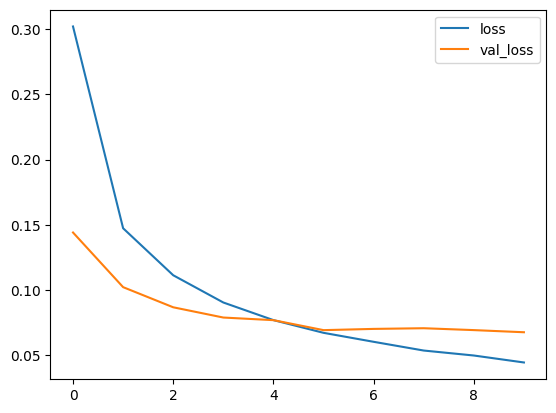

In [7]:
import matplotlib.pyplot as plt
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

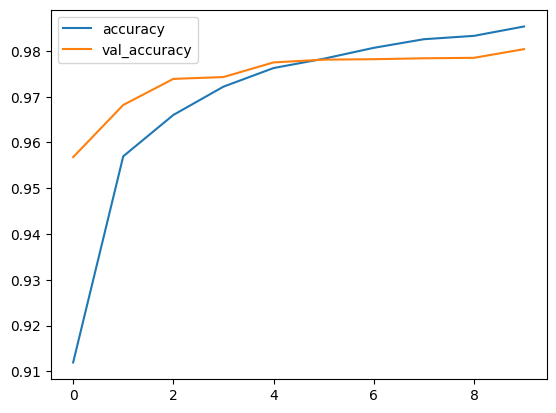

In [8]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend()

In [9]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0676 - accuracy: 0.9804


[0.06764449179172516, 0.980400025844574]

In [10]:
from sklearn.metrics import confusion_matrix

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
cm

313/313 [==============================] - 1s 2ms/step


array([[ 970,    1,    1,    1,    1,    1,    2,    1,    2,    0],
       [   0, 1128,    1,    1,    1,    0,    2,    0,    2,    0],
       [   0,    2, 1012,    2,    0,    0,    1,    7,    8,    0],
       [   0,    0,    2,  992,    0,    2,    0,    4,    5,    5],
       [   0,    0,    2,    0,  973,    0,    3,    0,    2,    2],
       [   2,    0,    0,   10,    2,  868,    4,    2,    3,    1],
       [   4,    2,    2,    1,    4,    5,  936,    0,    4,    0],
       [   2,    3,   11,    3,    2,    0,    0,  999,    2,    6],
       [   4,    0,    3,    4,    4,    5,    1,    3,  946,    4],
       [   1,    3,    1,    2,   14,    2,    0,    4,    2,  980]])